<a href="https://colab.research.google.com/github/Victoriambaka/INDEPENDENT-PROJECT-WEEK-11/blob/main/Part_1_Week_11_Independent_project_Regression_Victoria_Mbaka_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INDEPENDENT PROJECT 11: PREDICTION WITH REGRESSION**:(Part 1)

---



---



## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

***Input***: Home team, Away team, Tournament type (World cup, Friendly, Other)

***`Approach 1`***: Polynomial approach

What to train given:

*   Rank of home team
*   Rank of away team
*   Tournament scores.


Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

***`Approach 2`***: Logistic approach
Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



### b) Defining the Metric for Success


*   Being able to predict the goals for home team scores and the away team scores.



### c) Understanding the context

*   This is a problem that requires prediction(prediction problems are worked out using regression.)





### e) Data Relevance
The data provided is upto date and relevant for the analysis to be done.
the dataset can be found here: [Dataset](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc)

### d) Recording the Experimental Design

 The flow of this prediction analysis is as follows:

1.   Define the question
2.   Define the metric for success
3.   Understansing the context
4.   Documenting the experimental design taken and the appropriateness of the available data to answer the given question.

Expected flow for the assessment:

1.   Perform EDA
2.   Perform any necessary feature engineering 
3.   Check of multicollinearity
4.   Start building the model
5.   Cross-validate the model
6.   Compute RMSE
7.   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
8.   Perform appropriate regressions on the data including your justification
9.   Challenge your solution by providing insights on how you can make improvements. 



## 2. Reading the Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# Loading the Datasets
url = '/content/fifa_ranking.csv'
ranking = pd.read_csv(url)
url1 = '/content/results.csv'
results = pd.read_csv(url1)

## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#
print('ranking:',ranking.shape)
print('results = ',results.shape)


ranking: (57793, 16)
results =  (40839, 9)


In [8]:
# Previewing the top of our datasets
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [10]:
# Previewing the bottom of our dataset
# 
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [11]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [12]:
# Checking whether each column has an appropriate datatype
#
ranking.dtypes


rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [13]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 5. Tidying the Dataset

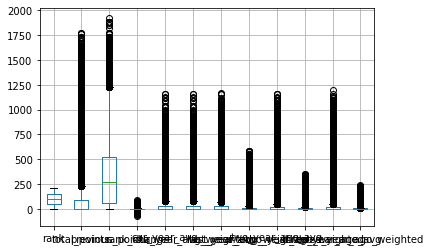

In [14]:
# Checking for Outliers
#
ranking.boxplot();

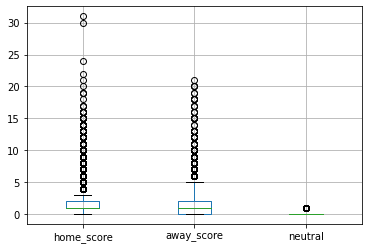

In [15]:
results.boxplot();

In [16]:
# There seems to be a number of outliers, but for this analysis, they will not be dropped since they are valid observations
# and their removal might distort the correct prediction.

In [17]:
# Checking for Anomalies
#
print('ranking:',ranking.duplicated().sum())
print('results:',results.duplicated().sum())

ranking: 37
results: 0


In [18]:
ranking = ranking.drop_duplicates()


In [19]:
# Identifying the Missing Data
#
print('ranking:',ranking.isnull().sum())
print('*'*100)
print('results:',results.isnull().sum())

ranking: rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
****************************************************************************************************
results: date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [20]:
# Dealing with the Missing Data
# There is no missing data.

In [21]:
# More data cleaning procedures
# dropping unnecessary columns
to_drop = ['country_abrv', 'rank_date']
ranking.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
# Renaming columns for uniformity during merging.
ranking.columns = ['rank', 'country', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation']
ranking.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [23]:
# merging datasets
data = ranking.merge(results, how = 'left',on = 'country')
data.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1909-04-04,Germany,Switzerland,1.0,0.0,Friendly,Karlsruhe,False
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1910-05-16,Germany,Belgium,0.0,3.0,Friendly,Duisburg,False
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1910-10-16,Germany,Netherlands,1.0,2.0,Friendly,Kleve,False
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1911-03-26,Germany,Switzerland,6.0,2.0,Friendly,Stuttgart,False
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1911-10-09,Germany,Austria,1.0,2.0,Friendly,Dresden,False


In [24]:
data = data.drop(columns=['city', 'neutral'])


In [25]:
data.isnull().sum()

rank                          0
country                       0
total_points                  0
previous_points               0
rank_change                   0
cur_year_avg                  0
cur_year_avg_weighted         0
last_year_avg                 0
last_year_avg_weighted        0
two_year_ago_avg              0
two_year_ago_weighted         0
three_year_ago_avg            0
three_year_ago_weighted       0
confederation                 0
date                       4774
home_team                  4774
away_team                  4774
home_score                 4774
away_score                 4774
tournament                 4774
dtype: int64

In [26]:
data['tournament'].unique()

array(['Friendly', 'FIFA World Cup qualification',
       'UEFA Euro qualification', 'FIFA World Cup', 'UEFA Euro',
       'Confederations Cup', 'FIFI Wild Cup', 'UEFA Nations League',
       'International Cup', 'Viva World Cup', 'Nordic Championship',
       'Island Games', 'CONIFA World Football Cup', 'Copa Lipton',
       'Copa Newton', 'Copa Premio Honor Argentino', 'Copa Roca',
       'Copa América', 'Copa Chevallier Boutell', 'Atlantic Cup',
       'Copa Carlos Dittborn', 'Copa Ramón Castilla', 'Copa Félix Bogado',
       'Copa Paz del Chaco', 'British Championship', 'Nations Cup',
       'Copa Rio Branco', 'Copa Oswaldo Cruz', "Copa Bernardo O'Higgins",
       'Brazil Independence Cup', 'Rous Cup', 'World Unity Cup',
       'Atlantic Heritage Cup', 'Tournoi de France',
       'African Nations Championship', 'Pan American Championship',
       'Gold Cup', nan, 'African Cup of Nations qualification',
       'African Cup of Nations', 'Balkan Cup',
       'Copa Premio Honor Uruguay

In [27]:
data = data.dropna()

In [28]:
data.duplicated().sum()

419072

In [29]:
data = data.drop_duplicates()

In [30]:
data.shape

(9821629, 20)

## 5. Exploratory Analysis

### Univariate analysis

In [31]:
data.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06,9.821629e+06
mean,6.978209e+01,1.727858e+02,4.553665e+02,-2.543336e-02,8.715642e+01,8.715642e+01,8.622388e+01,4.311201e+01,8.525097e+01,2.557532e+01,8.469992e+01,1.694000e+01,1.729996e+00,1.176426e+00
std,4.985433e+01,3.336669e+02,3.465433e+02,5.492537e+00,1.752408e+02,1.752408e+02,1.751401e+02,8.757010e+01,1.730298e+02,5.190894e+01,1.718319e+02,3.436638e+01,1.729587e+00,1.376217e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.600000e+01,0.000000e+00,1.460000e+02,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,6.200000e+01,0.000000e+00,4.410000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.050000e+02,2.122000e+02,6.500000e+02,1.000000e+00,8.955000e+01,8.955000e+01,8.843000e+01,4.422000e+01,8.500000e+01,2.550000e+01,8.500000e+01,1.700000e+01,2.000000e+00,2.000000e+00
max,2.090000e+02,1.775030e+03,1.920000e+03,9.200000e+01,1.158660e+03,1.158660e+03,1.169570e+03,5.847900e+02,1.159710e+03,3.479100e+02,1.200770e+03,2.401500e+02,3.100000e+01,2.100000e+01


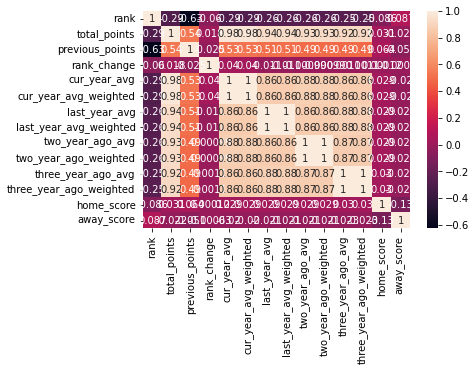

In [32]:
# Using the heatmap to understand the correlation between features. Only those with positive correlation with the home scores and away scores will be plotted.
sns.heatmap(data.corr(),annot=True);

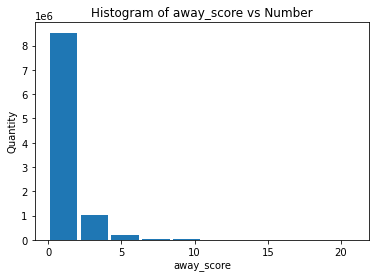

In [33]:
away_score= data['away_score']

plt.hist(away_score, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('away_score')
plt.ylabel('Quantity')
plt.title('Histogram of away_score vs Number')
plt.show()

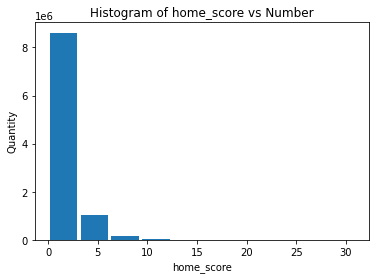

In [34]:
home_score = data['home_score']

plt.hist(home_score, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('home_score')
plt.ylabel('Quantity')
plt.title('Histogram of home_score vs Number')
plt.show()

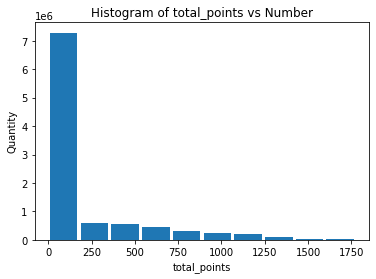

In [35]:
total_points = data['total_points']

plt.hist(total_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('total_points')
plt.ylabel('Quantity')
plt.title('Histogram of total_points vs Number')
plt.show()

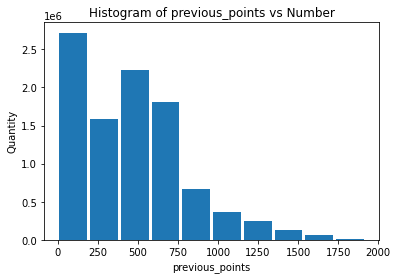

In [36]:
previous_points = data['previous_points']

plt.hist(previous_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('previous_points')
plt.ylabel('Quantity')
plt.title('Histogram of previous_points vs Number')
plt.show()

### Bivariate analysis

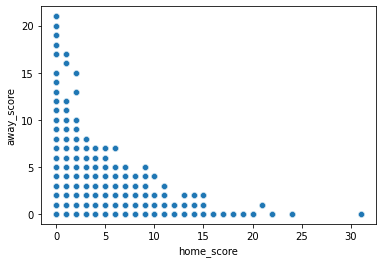

In [37]:
sns.scatterplot(x = data['home_score'], y = data['away_score']);

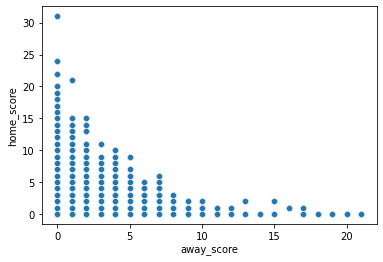

In [38]:
sns.scatterplot(x = data['away_score'], y = data['home_score']);

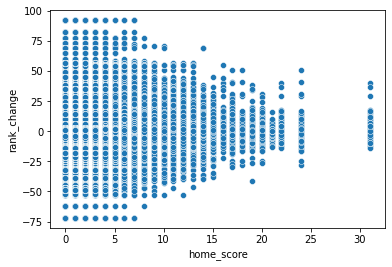

In [39]:
sns.scatterplot(x = data['home_score'], y = data['rank_change']);

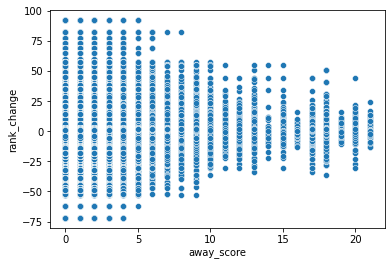

In [40]:
sns.scatterplot(x = data['away_score'], y = data['rank_change']);

## 6. Checking for multicollinearity.

In [41]:
# Focusing on independent features only

# Removing the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = data.drop(columns=['rank', 'rank_change','cur_year_avg_weighted', 'last_year_avg_weighted', 'two_year_ago_weighted', 'three_year_ago_weighted'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,total_points,previous_points,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,home_score,away_score
total_points,1.000000,0.537436,0.977091,0.940771,0.931104,0.923051,0.030577,-0.021692
previous_points,0.537436,1.000000,0.528460,0.506187,0.494368,0.486737,0.063631,-0.050696
cur_year_avg,0.977091,0.528460,1.000000,0.863435,0.875710,0.864553,0.029119,-0.019932
last_year_avg,0.940771,0.506187,0.863435,1.000000,0.862282,0.880558,0.029101,-0.021168
two_year_ago_avg,0.931104,0.494368,0.875710,0.862282,1.000000,0.867053,0.029389,-0.021322
three_year_ago_avg,0.923051,0.486737,0.864553,0.880558,0.867053,1.000000,0.029851,-0.022810
home_score,0.030577,0.063631,0.029119,0.029101,0.029389,0.029851,1.000000,-0.128817
away_score,-0.021692,-0.050696,-0.019932,-0.021168,-0.021322,-0.022810,-0.128817,1.000000


In [42]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
# The VIF score for each variable is found alongside the downwards sloping diagonal. Total points has a score of 788702.576624, previous_points
# has a score of 1.410112 etc.

# The highest value is for total points. Let's see how the VIF scores improve if we remove it from our dataset


,total_points,previous_points,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,home_score,away_score
total_points,804783.511175,2.108462,-422671.165006,-211233.308366,-125195.775923,-82880.868390,0.213192,1.225135
previous_points,2.108462,1.414496,-1.572508,-0.794872,-0.406689,-0.219729,-0.060893,0.047748
cur_year_avg,-422671.165006,-1.572508,221992.202510,110937.902758,65750.391632,43527.340984,-0.099091,-0.664103
last_year_avg,-211233.308366,-0.794872,110937.902758,55448.763737,32858.916977,21751.477324,-0.051029,-0.326755
two_year_ago_avg,-125195.775923,-0.406689,65750.391632,32858.916977,19481.814703,12891.605786,-0.037537,-0.187414
three_year_ago_avg,-82880.868390,-0.219729,43527.340984,21751.477324,12891.605786,8541.518730,-0.031526,-0.110318
home_score,0.213192,-0.060893,-0.099091,-0.051029,-0.037537,-0.031526,1.020310,0.128396
away_score,1.225135,0.047748,-0.664103,-0.326755,-0.187414,-0.110318,0.128396,1.018869


In [43]:
revised = independent_only.drop(columns=['total_points'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

# All scores have dropped, but all the previous points have droped significantly, indicating collinearity.

,previous_points,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,home_score,away_score
previous_points,1.414490,-0.465147,-0.241459,-0.078687,-0.002589,-0.060894,0.047745
cur_year_avg,-0.465147,5.902782,-1.532873,-2.253307,-1.574199,0.012877,-0.020664
last_year_avg,-0.241459,-1.532873,5.890041,-1.495264,-2.447535,0.004928,-0.005191
two_year_ago_avg,-0.078687,-2.253307,-1.495264,5.791535,-1.718298,-0.004372,0.003173
three_year_ago_avg,-0.002589,-1.574199,-2.447535,-1.718298,6.007938,-0.009570,0.015853
home_score,-0.060894,0.012877,0.004928,-0.004372,-0.009570,1.020310,0.128396
away_score,0.047745,-0.020664,-0.005191,0.003173,0.015853,0.128396,1.018868


## 7. Model building using polynomial regression approach.

In [44]:
# Model 1: Predict how many goals the home team scores.

In [45]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [46]:
#Get the 2 and the last column from the dataset 
X = data[['rank']].values
y = data['away_score'].values
print(X)
print(y)

[[  1]
 [  1]
 [  1]
 ...
 [206]
 [206]
 [206]]
[0. 3. 2. ... 2. 0. 3.]


In [ ]:
plt.scatter(X, y, color='blue') 
plt.title('scatterplot for data')
plt.xlabel('rank')
plt.ylabel('away score')
plt.show()

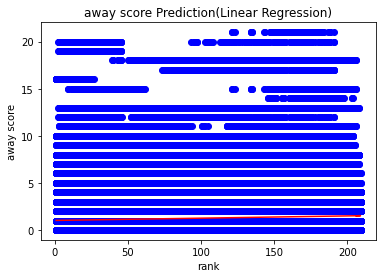

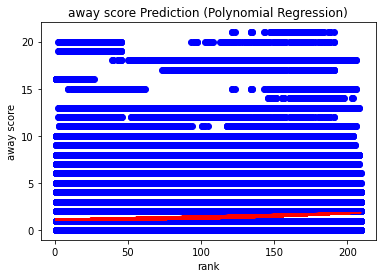

In [48]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# # Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('away score Prediction(Linear Regression)')
plt.xlabel('rank')
plt.ylabel('away score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('away score Prediction (Polynomial Regression)')
plt.xlabel('rank')
plt.ylabel('away score')
plt.show()

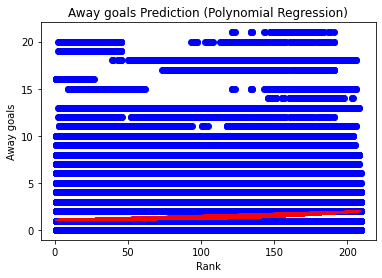

In [49]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Away goals Prediction (Polynomial Regression)')
plt.xlabel('Rank')
plt.ylabel('Away goals')
plt.show()

### Prediction

In [ ]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[10]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

In [51]:
# Both predictions predict that the away goals will be 1

In [52]:
# MODEL 2: HOW MANY GOALS THE HOME TEAM WILL SCORE.

In [53]:
#Get the 2 and the last column from the dataset 
X = data[['rank']].values
y = data['home_score'].values
print(X)
print(y)

[[  1]
 [  1]
 [  1]
 ...
 [206]
 [206]
 [206]]
[1. 0. 1. ... 1. 2. 0.]


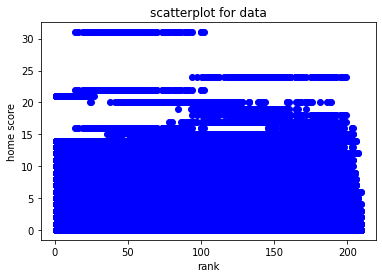

In [54]:
plt.scatter(X, y, color='blue') 
plt.title('scatterplot for data')
plt.xlabel('rank')
plt.ylabel('home score')
plt.show()

In [ ]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# # Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('home score Prediction(Linear Regression)')
plt.xlabel('rank')
plt.ylabel('home score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('home score Prediction (Polynomial Regression)')
plt.xlabel('rank')
plt.ylabel('home score')
plt.show()

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('home goals Prediction (Polynomial Regression)')
plt.xlabel('Rank')
plt.ylabel('home goals')
plt.show()

In [ ]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[10]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

In [ ]:
# The prediction of the home goals is also 1.